In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [33]:
# Load the dataset
wine_data = pd.read_csv('datasets/winequality-red.csv')

# Display the first few rows of the dataset
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [36]:
# Check for missing values
wine_data.isnull().sum(axis=0)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [37]:
# Define input features and output
X = wine_data.drop("fixed acidity", axis=1)
y = wine_data["fixed acidity"]

# Check the shapes of X (input matrix) and y (target vector)
X_shape = X.shape
y_shape = y.shape

print(X_shape, y_shape)

(1599, 11) (1599,)


In [38]:
# Manually split the data into training and test sets (80% training, 20% testing)

# Shuffle the indices
np.random.seed(69) # Seed for reproducibility
shuffled_indices = np.random.permutation(len(X))


# Define the size of the training set (80% of data)
train_size = int(0.8 * len(X))

# Split the indices
train_indices = shuffled_indices[:train_size]
test_indices = shuffled_indices[train_size:]

# Split the data
X_train = X.iloc[train_indices]
y_train = y.iloc[train_indices]
X_test = X.iloc[test_indices]
y_test = y.iloc[test_indices]

# Add bias term (column of ones) to the input features
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

print(X_train_bias.shape, y_train.shape, X_test_bias.shape, y_test.shape)

(1279, 12) (1279,) (320, 12) (320,)


In [44]:
# Compute the coefficients using the closed-form solution (Normal Equation)
w = np.linalg.inv(X_train_bias.T.dot(X_train_bias)).dot(X_train_bias.T).dot(y_train)

print(w)

[-6.24144240e+02  2.77007307e-01  1.90844065e+00 -2.37373489e-01
 -3.59264886e+00  7.26935423e-03 -6.02944752e-03  6.47338738e+02
 -5.33392554e+00 -7.23720205e-01  5.35447085e-01  3.46982982e-02]


In [47]:
# Get predictions for the test set
predictions = X_test_bias.dot(w)

# Calculate the SSE and MSE
sse = np.sum((predictions - y_test) ** 2)
mse = sse / len(y_test)

print(predictions[:5], sse, mse)

[7.52676189 8.19696395 7.8476893  7.27589631 7.26443653] 138.2603181759206 0.4320634942997518


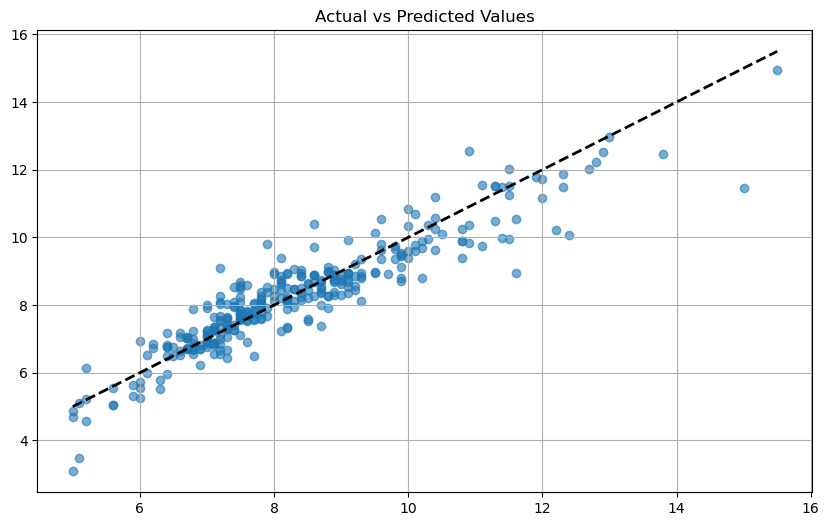

In [42]:
# Plotting actual values vs predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # diagonal line for perfect predictions
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()